# Predicting Employee Attrition with a Decision Tree Model

## A. Introduction

Employee attrition is the process of employees leaving the company and may result in high cost for a company. The goal of this mini-project is to predict employee attrition.<br>

In this project, I will use a fictional dataset made by IBM: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset <br>
The goal is to understand what are the most important features affecting employee attrition.

## B. Data preparation

### Import libraries and dataset

In [2]:
# Import pandas (as pd) to read the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from IPython.display import Image
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

In [3]:
# Read "WA_Fn-UseC_-HR-Employee-Attrition.csv" and save it in a DataFrame called data
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

### Overview of the data

In [4]:
# Display the first 5 rows of data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Data quality check

In [5]:
# Data quality check: looking for NaN
display(df.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

### Column data type

In [6]:
# Get some information on the types of variables in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Observations

The dataset contains a total of 1470 entries (employees) and 35 columns (attributes). <br>
Amongst the 35 attributes, 26 have a integer value (numerical variables) and the remaining 9 are objects (categorical variables):
- Attrition
- BusinessTravel
- Department
- EducationField
- Gender
- JobRole
- MaritalStatus
- Over18
- OverTime

As a result, we need to transform the categorical variables first before starting the analysis.<br>
Note that only the attribute BusinessTravel is an __ordinal__ category and Attrition and Overtime are __binary__ categories, all the rest are __nominal__.

We then display all unique values from these columns:
<br>


In [7]:
# Display unique values of the "Attrition" column
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [8]:
# Display unique values of the "BusinessTravel" column
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [9]:
# Display unique values of the "Department" column
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [10]:
# Display unique values of the "EducationField" column
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [11]:
# Display unique values of the "Gender" column
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [12]:
# Display unique values of the "JobRole" column
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [13]:
# Display unique values of the "MaritalStatus" column
df.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [14]:
# Display unique values of the "Over18" column
df.Over18.unique()

array(['Y'], dtype=object)

In [15]:
# Display unique values of the "OverTime" column
df.OverTime.unique()

array(['Yes', 'No'], dtype=object)

### Dropping column Over18, EmployeeCount, EmployeeNumber, StandardHours

As the column Over18, EmployeeCount and StandardHours only contain 1 unique values we can drop it. And EmployeeNumber is not relevant to our study.

In [16]:
# Dropping column Over18
df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

### Encode the BusinessTravel, Attrition and OverTime values
We transform the values into numbers:
- BusinessTravel: "Non-Travel" to 0, "Travel_Rarely" to 1, "Travel_Frequently" to 2
- Attrition: "No" to 0, "Yes" to 1
- OverTime: "No" to 0, "Yes" to 1

In [17]:
# Change the type of the columns to categorical
df.BusinessTravel = df.BusinessTravel.astype('category')
df.Attrition      = df.Attrition.astype('category')
df.OverTime       = df.OverTime.astype('category')

# Provide the correct order of categories
df.BusinessTravel = df.BusinessTravel.cat.reorder_categories(['Non-Travel','Travel_Rarely','Travel_Frequently'])
df.Attrition      = df.Attrition.cat.reorder_categories(['No','Yes'])
df.OverTime       = df.OverTime.cat.reorder_categories(['No','Yes'])

# Encode categories with integer values
df.BusinessTravel = df.BusinessTravel.cat.codes
df.Attrition      = df.Attrition.cat.codes
df.OverTime       = df.OverTime.cat.codes

### Add columns for each categories from the 5 nominal attributes

In [18]:
# store dummies into new DataFrames
df_Departments = pd.get_dummies(df.Department, prefix='Dept')
df_EducationFields = pd.get_dummies(df.EducationField, prefix='Stud')
df_Gender = pd.get_dummies(df.Gender)
df_JobRole = pd.get_dummies(df.JobRole)
df_MaritalStatus = pd.get_dummies(df.MaritalStatus)

# drop the old columns from the main dataset
df = df.drop(['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], axis = 1)

# Join the new dataframes in the main dataset
df = df.join(df_Departments)
df = df.join(df_EducationFields)
df = df.join(df_Gender)
df = df.join(df_JobRole)
df = df.join(df_MaritalStatus)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1470 non-null   int64
 1   Attrition                    1470 non-null   int8 
 2   BusinessTravel               1470 non-null   int8 
 3   DailyRate                    1470 non-null   int64
 4   DistanceFromHome             1470 non-null   int64
 5   Education                    1470 non-null   int64
 6   EnvironmentSatisfaction      1470 non-null   int64
 7   HourlyRate                   1470 non-null   int64
 8   JobInvolvement               1470 non-null   int64
 9   JobLevel                     1470 non-null   int64
 10  JobSatisfaction              1470 non-null   int64
 11  MonthlyIncome                1470 non-null   int64
 12  MonthlyRate                  1470 non-null   int64
 13  NumCompaniesWorked           1470 non-null   int

### Descriptive Statistics

#### How many employees left the company ?

In [19]:
# Print the number of employees who left/stayed
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

__Percentage values:__

In [20]:
# Use len() function to get the total number of observations and save it as the number of employees
n_employees = len(df)

# Print the percentage of employees who left/stayed
df.Attrition.value_counts()/n_employees*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

#### Correlation matrix visualisation

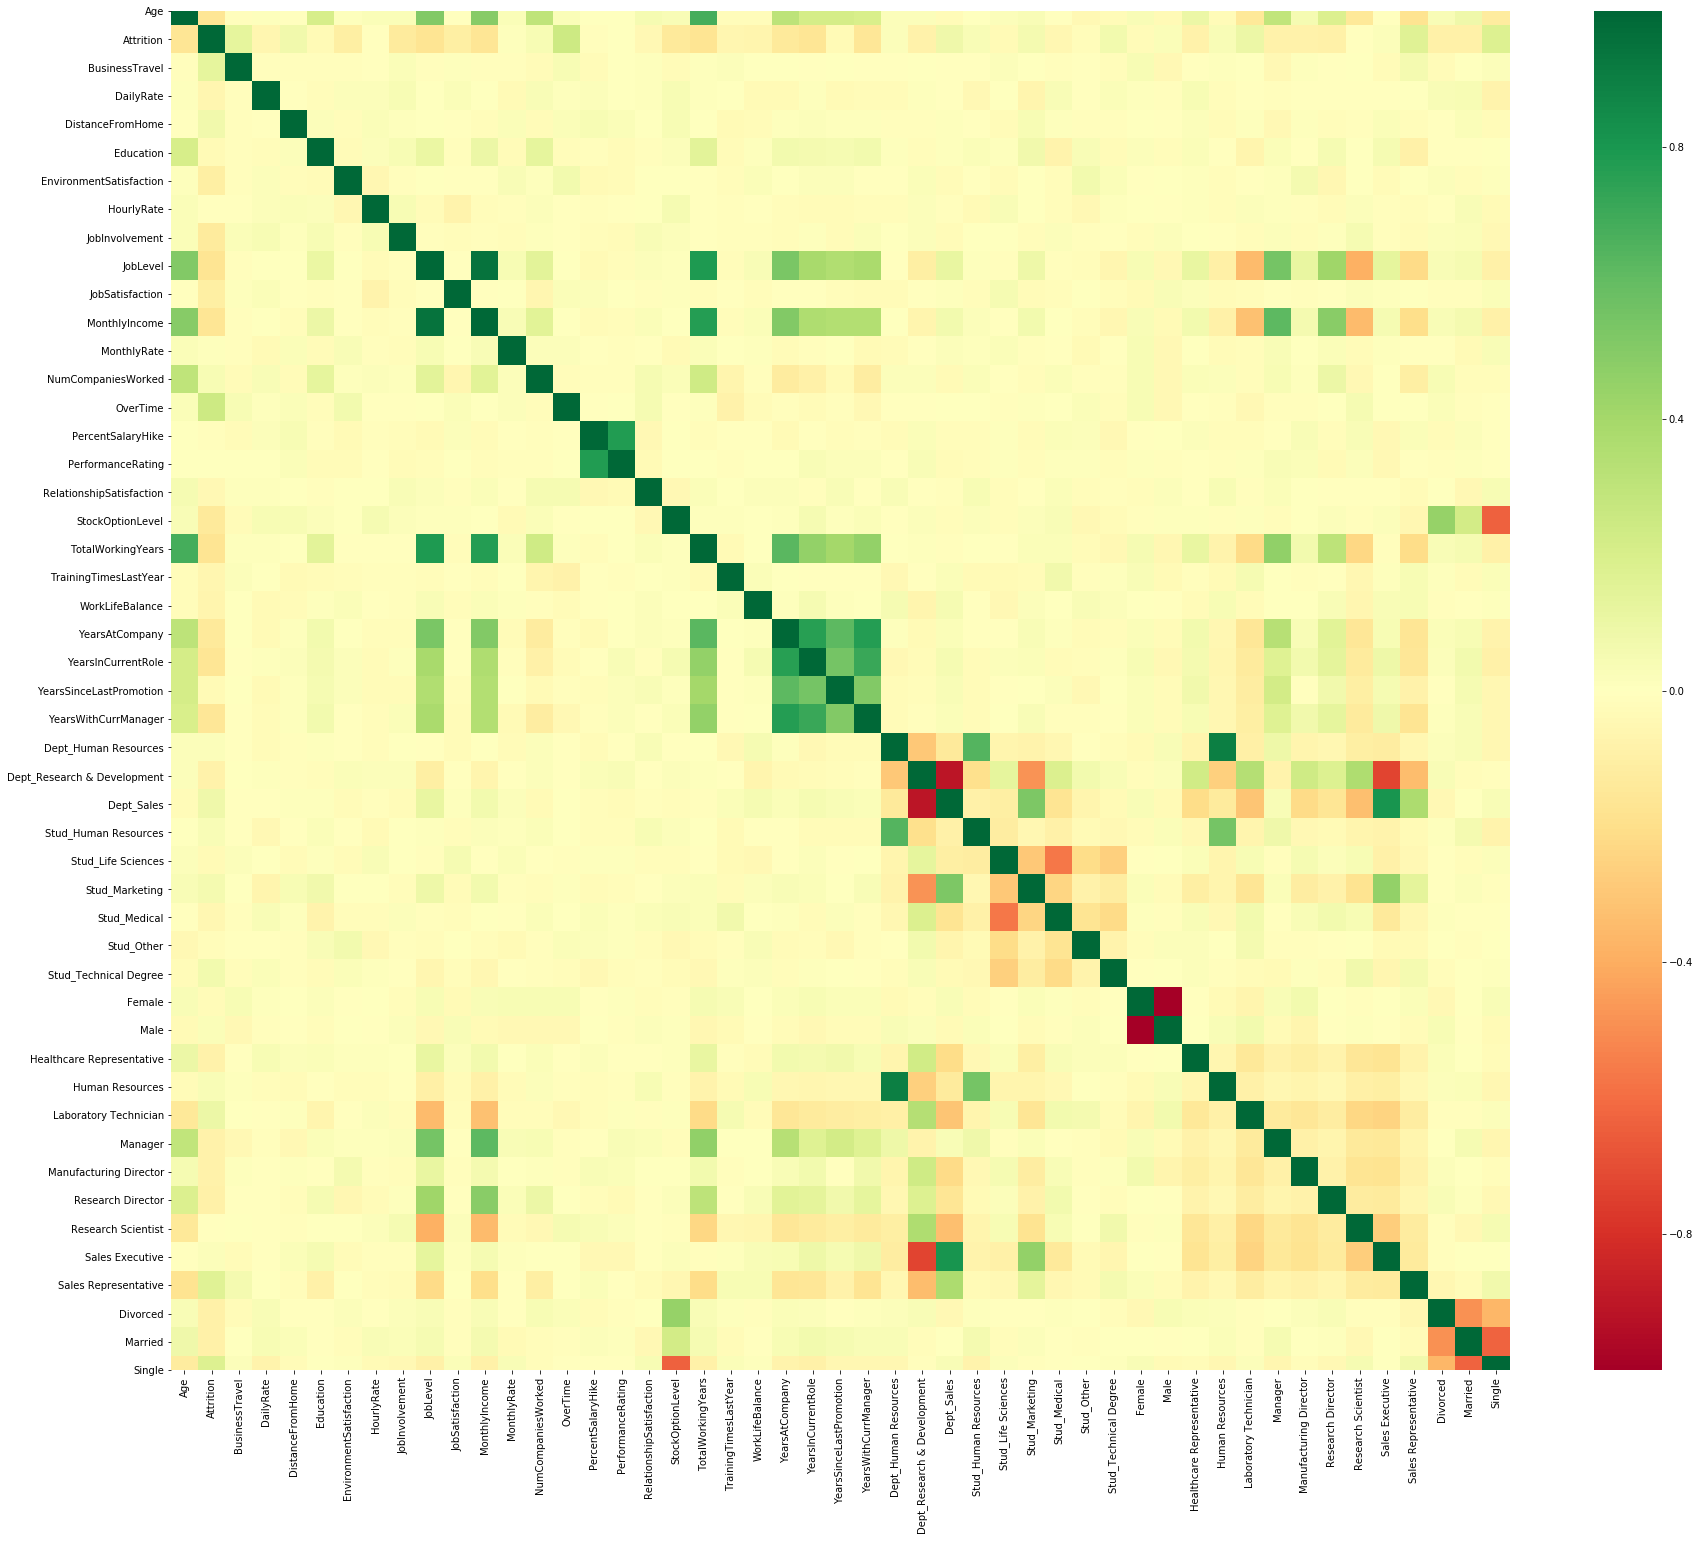

In [21]:
corr_matrix = df.corr()
plt.subplots(figsize=(30,25))
sns.heatmap(corr_matrix, cmap="RdYlGn")
plt.show()

## C. Predicting Employee Attrition
### Splitting the data
#### Target and feature

In [22]:
# Choose the dependent variable column (Attrition) and set it as target
target = df.Attrition

# Drop column churn and set everything else as features
features = df.drop("Attrition",axis=1)

#### Train/Test split

In [23]:
# Set the test sample to be 25% of the total data
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.20, random_state=0)

### Decision Tree Classifier

#### Searching for optimal depth and sample values

In [24]:
# Generate values for maximum depth
depth = [i for i in range(5,10,1)]

# Generate values for minimum sample size
samples = [i for i in range(2,10,2)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters, cv=5)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
param_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 6}

In [25]:
# Initialize it and call model by specifying the best parameter: 'max_depth': 6, 'min_samples_leaf': 6
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, random_state=42)

# Apply a decision tree model to fit features to the target
model.fit(features_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

### Evaluating the Attrition Prediction model
#### Accuracy on the training set

In [26]:
# Check the accuracy score of the prediction for the training set
model.score(features_train,target_train)*100

89.37074829931973

#### Accuracy on the testing set

In [27]:
# Check the accuracy score of the prediction for the test set
model.score(features_test,target_test)*100

82.99319727891157

#### Recall score, ROC/AUC Score and ROC Curve

In [28]:
# Use the initial model to predict churn
prediction = model.predict(features_test)

# Print the recall score of the model predictions
recall_score(target_test, prediction) * 100

30.612244897959183

In [38]:
# Print the ROC/AUC score of the model predictions
model_auc_score = roc_auc_score(target_test, prediction) * 100
model_auc_score

62.04081632653061

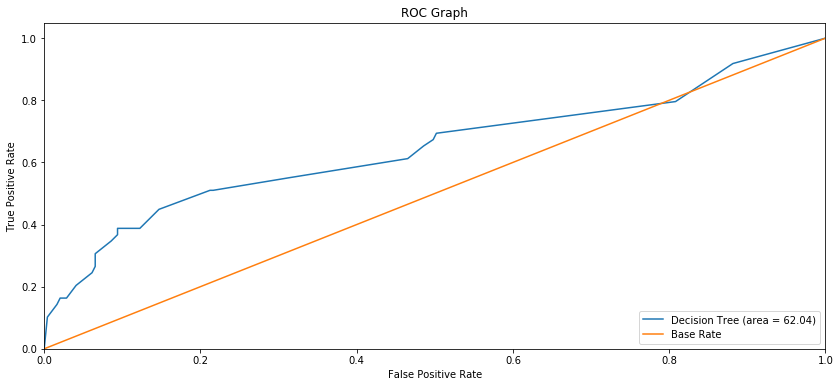

In [40]:
fpr, tpr, thresholds = roc_curve(target_test, model.predict_proba(features_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % model_auc_score)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### Decision Tree visualisation

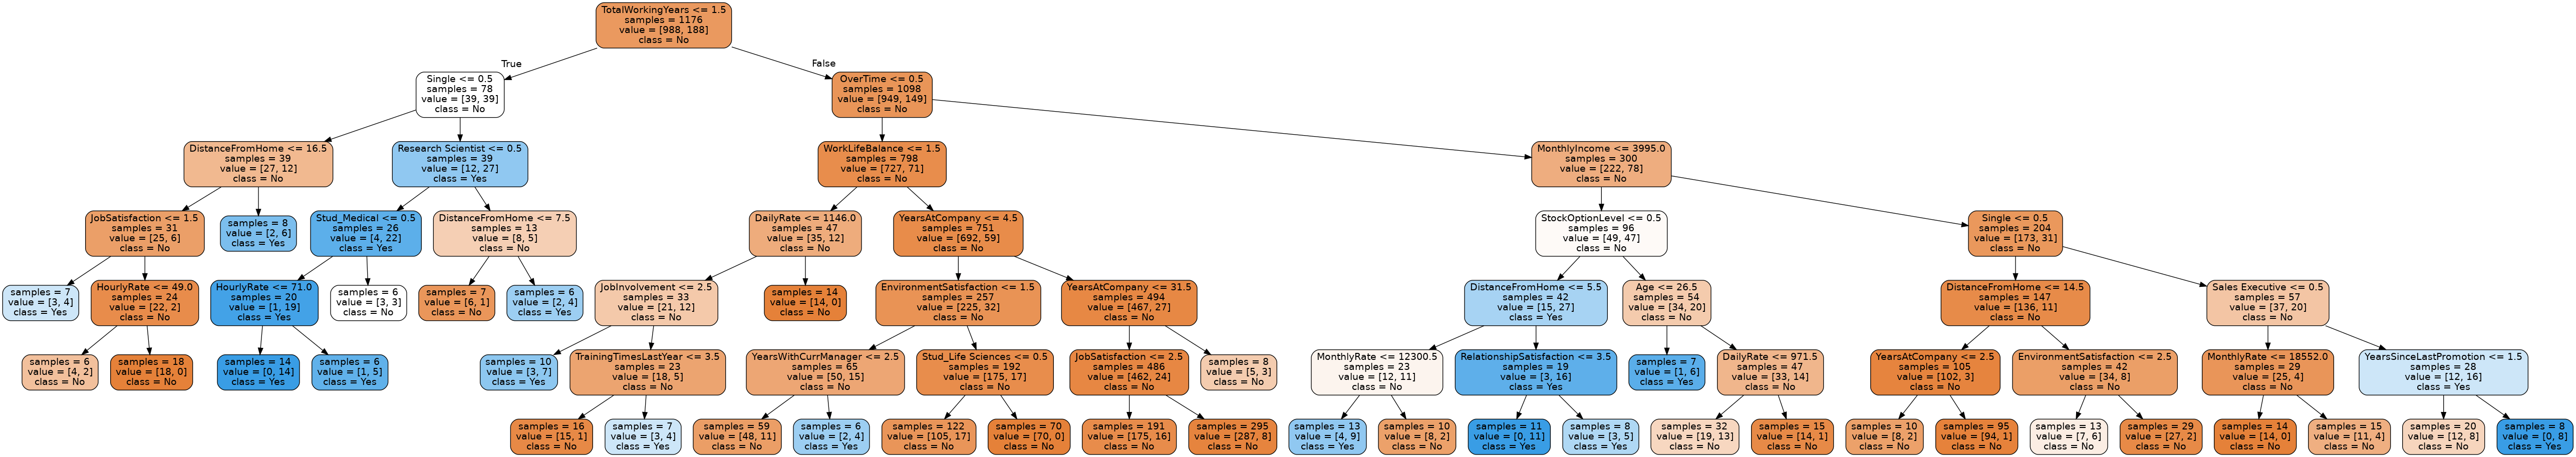

In [41]:
# Export our trained model as a .dot file
with open("tree.dot", 'w') as file:
     file = tree.export_graphviz(model,
                              out_file=file,
                              max_depth = 6,
                              impurity = False,
                              feature_names = features.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

# Display image
PImage("tree.png", height=2000, width=1900)

## D. Final remarks
The goal of this mini project was to apply my knowledge on data analysis and model prediction to a Workforce dataset.<br>
I have chosen to approach the problem with a decision tree model but could also be tackled by multiple other methods (Logistic Regression, Random Forest, Gradient Boosting, etc.). <br>
After doing some exploratory data analysis, I prepared the relevant data (drop some columns, transform categorical attributes in new columns) and built the model with optimised parameters.<br>
Finally I evaluated the model and get an accuracy of 89% on the training set, 83% on the test set and a AUC/ROC score of 62%. <br><br>

Bigger dataset, more attributes, testing different prediction classifier models could definitely help to refine this analysis and get higher accuracy and AUC/ROC score.

The model could then be used to give an Attrition risk score to employees, and also to look at which indicators (e.g MonthlyIncome, DistanceFromHome) as build a strategic retention plan.